# Polinomio de interpolación de Newton

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/caramirezs/MetNum_202210/blob/main/2_Ajuste_de_curvas/2.1_Polinomio_de_interpolacion_de_Newtow.ipynb)

In [16]:
def NewtonPol(dat):
    """
    Implementación del interpolador de Newton
    Entradas:
    dat -- lista de puntos (x, y) en el plano

    Salidas:
    F -- tabla de diferencias divididas
    P -- función de interpolación
    """
    n = len(dat)-1
    F = [[0 for x in dat] for x in dat]  # crear tabla nula

    for i, p in enumerate(dat):  # condiciones iniciales
        F[i][0] = p[1]

    for i in range(1, n+1):  # tabla de diferencias divididas
        for j in range(1, i+1):
            F[i][j] = round((F[i][j-1]-F[i-1][j-1])/(dat[i][0]-dat[i-j][0]),4)

    def L(k, x):
        """Implementación funciones L_k(x)"""
        # polinomio $L_k(x)=\prod\limits_{i \leq k}(x-x_i)$
        out = 1
        for i, p in enumerate(dat):
            if i <= k:
                out *= (x - p[0])
        return out

    def P(x):
        """Implementación polinomio P(x)"""
        # $P(x)=f[x_0]+\sum_{k=1}^{n}f[x_0,x_1,\ldots,x_k]L_{k-1}(x)$
        newt = 0
        for i in range(1, n+1):
            newt += F[i][i]*L(i-1, x)
        return newt + F[0][0]

    return F, P

In [17]:
datos = [[2,6],[5,4],[8,4],[12,3],[6,5]]
F, P = NewtonPol(datos)

In [19]:
F

[[6, 0, 0, 0, 0],
 [4, -0.6667, 0, 0, 0],
 [4, 0.0, 0.1111, 0, 0],
 [3, -0.25, -0.0357, -0.0147, 0],
 [5, -0.3333, 0.0416, 0.0773, 0.023]]

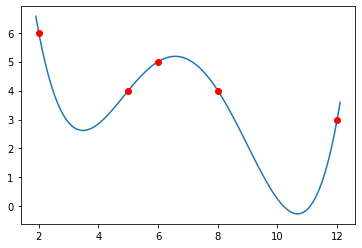

In [12]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([2, 5, 6, 8, 12])
y = np.array([6, 4, 5, 4, 3])
xx = np.linspace(1.9,12.1,100)
plt.plot(xx, P(xx), '-',x, y, 'ro')